# Linear Regression Model

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
This code is the implementation of linear regression model for yield 
predication.

We are using linear regression model which is imported from Sklearn library.

Data is comprised of 234 samples. Each training sample is consist of 16 input
features(x1,x2,x3,....) and corresponding output(y) i.e yield.

x1= Flied 
x2= Seed
x3= max temp
x4= min temp
x5= Wind speed
x6= humidity
x7= Precipitation
x8= Rain fall
x9= N
x10=P
x11=K
x12=NDVI
x13=NDMI
x14=MSAVI
x15=NRDE
x16= Soil fertility

y= Yield 

linear model
h=theta0+ theta1*x1+ theta2*x2+ theta3*x3 .......theta16*x16

these theta's are trained during training.

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

1. Importing required packages.
2. Read the data/load the data.
3. Data Cleaning.
4. Visualizing the data, how data looks like.
5. Spliting dataset into training and testing data.
6. Imported Linear regression model is Trained using training data
7. Predication is performed by trained model using testing data
8. Evaluate the Model: Measure the Mean Sqaure Error
9. Prediction for the new sample



# Importing required packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import  mean_squared_error
from sklearn.metrics import  mean_absolute_error


#  Read the data/load the data

In [2]:
# we are using pandas libaray for reading the file
# We are reading ecxel file and path should be where you ecxel file is located.
# place "r" before the path string to address special character,such as '\'.
# Don't forget to put the file name at the end of the path + '.xlsx'

data=pd.read_excel(r"C:\python\Yield Predicition\sugaravg.xlsx")


In [3]:
#Showing the first five entries of data
data.head()

,Location,Seed,N,P,K,Soil Fertlity,maxt,mint,wind,hum,preci,rain,ndvi,ndmi,msavi,ndre,Yield
0,11,21,103,57,50,2,31.016667,19.041667,2.025000,63.591667,0.450000,32.183333,0.435833,0.295833,0.225000,0.045833,818
1,11,21,103,57,50,2,31.500000,18.575000,2.125000,60.400000,4.916667,31.125000,0.520000,0.366667,0.278333,0.149167,836
2,11,21,69,23,25,1,31.016667,19.041667,2.025000,63.591667,0.450000,32.183333,0.430833,0.288333,0.240833,0.046667,615
3,11,21,102,56,50,1,31.500000,18.575000,2.125000,60.400000,4.916667,31.125000,0.488333,0.333333,0.281667,0.104167,719
4,11,22,103,57,50,2,33.141667,19.250000,2.058333,55.800000,0.050000,18.436667,0.430833,0.288333,0.240833,0.046667,592


# Data Cleaning

In [4]:
# As there some extra columns so we need to perform data cleaning

#data.drop(columns='Month', inplace=True)
#data.head()

# Visualizing the data, how data looks like.

In [5]:
# Information about your data, how many entries and which type of data is present in dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       100 non-null    int64  
 1   Seed           100 non-null    int64  
 2   N              100 non-null    int64  
 3   P              100 non-null    int64  
 4   K              100 non-null    int64  
 5   Soil Fertlity  100 non-null    int64  
 6   maxt           100 non-null    float64
 7   mint           100 non-null    float64
 8   wind           100 non-null    float64
 9   hum            100 non-null    float64
 10  preci          100 non-null    float64
 11  rain           100 non-null    float64
 12  ndvi           100 non-null    float64
 13  ndmi           100 non-null    float64
 14  msavi          100 non-null    float64
 15  ndre           100 non-null    float64
 16  Yield          100 non-null    int64  
dtypes: float64(10), int64(7)
memory usage: 13.4 KB


In [6]:
#tells the shape of dataframe
data.shape

(100, 17)

<AxesSubplot:xlabel='rain', ylabel='Yield'>

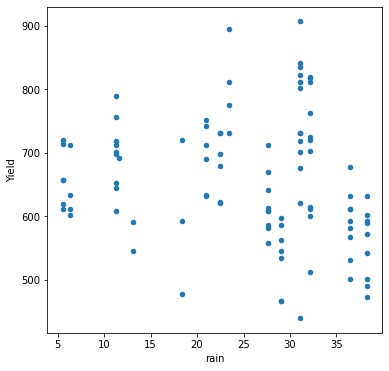

In [7]:
data.plot(kind='scatter', x='rain', y='Yield', figsize=(6,6))

<AxesSubplot:xlabel='msavi', ylabel='Yield'>

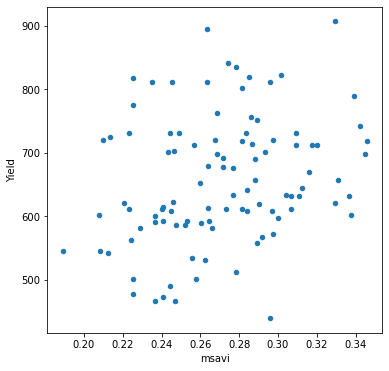

In [8]:
data.plot(kind='scatter', x='msavi', y='Yield', figsize=(6,6))

<AxesSubplot:xlabel='ndmi', ylabel='Yield'>

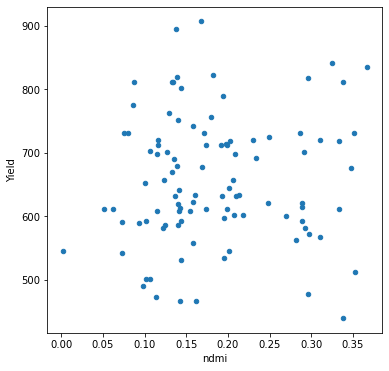

In [9]:
data.plot(kind='scatter', x='ndmi', y='Yield', figsize=(6,6))

<AxesSubplot:xlabel='preci', ylabel='Yield'>

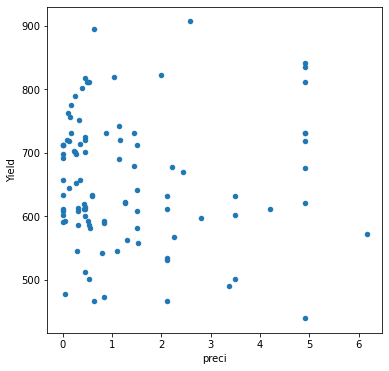

In [10]:
data.plot(kind='scatter', x='preci', y='Yield', figsize=(6,6))

<AxesSubplot:xlabel='hum', ylabel='Yield'>

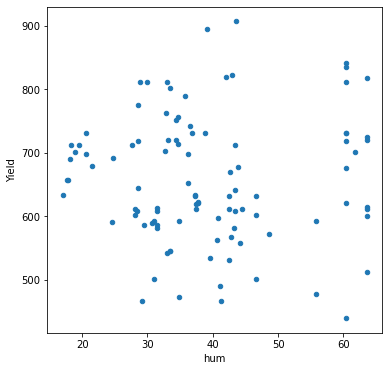

In [11]:
data.plot(kind='scatter', x='hum', y='Yield', figsize=(6,6))

# Spliting dataset into training and testing data

Total of 60 samples we are taking first 190 samples as training data and last 44 samples as testing data

In [12]:
#Training data
training_data=data.iloc[:80, 0:15]
training_data.head()

,Location,Seed,N,P,K,Soil Fertlity,maxt,mint,wind,hum,preci,rain,ndvi,ndmi,msavi
0,11,21,103,57,50,2,31.016667,19.041667,2.025000,63.591667,0.450000,32.183333,0.435833,0.295833,0.225000
1,11,21,103,57,50,2,31.500000,18.575000,2.125000,60.400000,4.916667,31.125000,0.520000,0.366667,0.278333
2,11,21,69,23,25,1,31.016667,19.041667,2.025000,63.591667,0.450000,32.183333,0.430833,0.288333,0.240833
3,11,21,102,56,50,1,31.500000,18.575000,2.125000,60.400000,4.916667,31.125000,0.488333,0.333333,0.281667
4,11,22,103,57,50,2,33.141667,19.250000,2.058333,55.800000,0.050000,18.436667,0.430833,0.288333,0.240833


In [13]:
training_data.shape

(80, 15)

In [14]:
training_data.describe()

,Location,Seed,N,P,K,Soil Fertlity,maxt,mint,wind,hum,preci,rain,ndvi,ndmi,msavi
count,80.000000,80.00000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000
mean,13.025000,22.17500,92.187500,46.437500,42.987500,2.012500,35.262808,23.344578,2.883151,39.631647,1.332318,26.255802,0.456709,0.182156,0.269400
std,1.750045,0.75933,24.081136,17.312353,11.522673,0.787461,2.945412,3.103695,0.925954,14.102058,1.570740,9.536856,0.041139,0.084555,0.033963
min,11.000000,21.00000,40.000000,23.000000,0.000000,1.000000,31.016667,18.575000,2.025000,17.000000,0.000000,5.533333,0.352236,0.001569,0.188931
25%,11.000000,22.00000,70.500000,25.000000,34.250000,1.000000,32.895833,20.485417,2.125000,30.539062,0.294792,21.008333,0.430417,0.124604,0.244167
50%,14.000000,22.00000,107.000000,50.000000,50.000000,2.000000,34.911111,23.583333,2.539514,35.307292,0.542431,29.030833,0.456250,0.156250,0.267917
75%,15.000000,23.00000,110.000000,60.000000,50.000000,3.000000,37.854167,25.770833,3.358333,46.541667,2.029167,32.183333,0.488333,0.230833,0.290208
max,15.000000,23.00000,120.000000,69.000000,50.000000,3.000000,40.583333,28.916667,5.858333,63.591667,4.916667,38.275000,0.542500,0.366667,0.345833


In [15]:
training_label=data.iloc[:80, -1]
training_label.head()

0    818
1    836
2    615
3    719
4    592
Name: Yield, dtype: int64

In [16]:
print('shape:', training_label.shape)
print('type:', training_label.dtype)

shape: (80,)
type: int64


In [17]:
#testing data

testing_data=data.iloc[80:, 0:15]
testing_data.head()

,Location,Seed,N,P,K,Soil Fertlity,maxt,mint,wind,hum,preci,rain,ndvi,ndmi,msavi
80,15,21,50,25,25,2,39.500000,27.750000,3.175000,28.083333,0.016667,6.316667,0.495000,0.206667,0.337500
81,15,21,80,25,25,2,39.333333,28.500000,4.266667,37.416667,0.425000,5.533333,0.458333,0.174167,0.306667
82,15,21,110,50,50,2,37.333333,26.916667,4.783333,37.750000,1.266667,22.516667,0.503333,0.248333,0.329167
83,15,21,110,70,50,2,40.000000,28.416667,5.625000,37.208333,0.600000,21.008333,0.437500,0.210000,0.336667
84,15,21,110,69,50,2,40.333333,27.166667,5.100000,36.250000,0.266667,11.308333,0.507500,0.208333,0.345000


In [18]:
testing_label=data.iloc[80:, -1]
testing_label.head()

80    602
81    612
82    621
83    632
84    698
Name: Yield, dtype: int64

# Imported Linear regression model is Trained using training data

In [19]:
# linear regression model from sklearn is used
# normalization is performed
model = linear_model.LinearRegression(normalize=True)

#model is trained using our data
model.fit(training_data,training_label)
y_train_pred = model.predict(training_data)

# Predication is performed by trained model using testing data

In [20]:
# Now prediction is formed using trained model
y_predicted = model.predict(testing_data)

Feature: 0, Score: -56.32215
Feature: 1, Score: -21.20460
Feature: 2, Score: 1.38209
Feature: 3, Score: -0.25331
Feature: 4, Score: -1.49037
Feature: 5, Score: -21.89845
Feature: 6, Score: -22.18098
Feature: 7, Score: 9.62697
Feature: 8, Score: 60.37915
Feature: 9, Score: -2.40457
Feature: 10, Score: 7.69680
Feature: 11, Score: -2.64231
Feature: 12, Score: -296.55434
Feature: 13, Score: -316.37800
Feature: 14, Score: 1384.25115


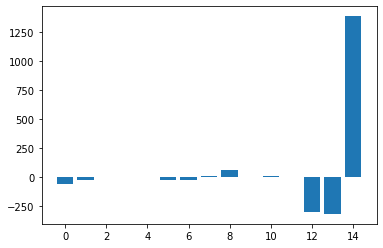

In [21]:
# Checking the importance of features
importance = model.coef_

# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance

plt.bar([x for x in range(len(importance))], importance)
plt.show()

# Evaluate the Model: Measure the Mean Sqaure Error

In [22]:
# Model is evaluated by measuring Mean squared error
print("Mean squared error is: ", mean_squared_error(testing_label, y_predicted))

print("Weights: ", model.coef_)
print("Intercept: ", model.intercept_)

Mean squared error is:  8427.469726703883
Weights:  [-5.63221481e+01 -2.12046042e+01  1.38209098e+00 -2.53305359e-01
 -1.49037134e+00 -2.18984518e+01 -2.21809846e+01  9.62696832e+00
  6.03791467e+01 -2.40457370e+00  7.69679886e+00 -2.64230673e+00
 -2.96554339e+02 -3.16378003e+02  1.38425115e+03]
Intercept:  2223.7113703861414


In [23]:
training_error= mean_absolute_error(training_label, y_train_pred)
print('MAE: %.3f' % training_error)
error= mean_absolute_error(testing_label, y_predicted)
print('MAE: %.3f' % error)

MAE: 45.236
MAE: 78.242


<Figure size 432x288 with 0 Axes>

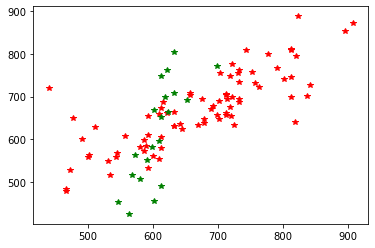

<Figure size 432x288 with 0 Axes>

In [24]:
plt.plot(training_label, y_train_pred,'*r')
plt.plot(testing_label, y_predicted, '*g')
plt.figure()


In [25]:

x = training_data.iloc[:,14]
x.shape
y_train_pred.shape

(80,)

In [26]:
x1 = testing_data.iloc[:,14]
x.shape
y_predicted.shape

(20,)

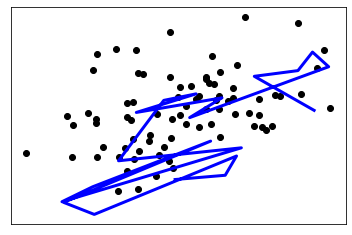

In [27]:
plt.scatter(x, y_train_pred, color="black")
plt.plot(x1, y_predicted, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

#  Prediction for the new sample

In [28]:
#Just for checking I have taken testing sample

In [29]:
print('input features')
testing_data.iloc[3]

input features


Location          15.000000
Seed              21.000000
N                110.000000
P                 70.000000
K                 50.000000
Soil Fertlity      2.000000
maxt              40.000000
mint              28.416667
wind               5.625000
hum               37.208333
preci              0.600000
rain              21.008333
ndvi               0.437500
ndmi               0.210000
msavi              0.336667
Name: 83, dtype: float64

In [30]:
print('Yield')
testing_label.iloc[3]

Yield


632

In [31]:
# Here you can enter new input in array below

In [32]:
test_sample= np.array([15,21,110,70,50,2,40,28.416667,5.625,37.208333,0.6,21.00833,0.437500,0.21,0.336667])
test_sample

array([ 15.      ,  21.      , 110.      ,  70.      ,  50.      ,
         2.      ,  40.      ,  28.416667,   5.625   ,  37.208333,
         0.6     ,  21.00833 ,   0.4375  ,   0.21    ,   0.336667])

In [33]:
test_sample.shape

(15,)

In [34]:
type(test_sample)

numpy.ndarray

In [35]:
test_sample.ndim

1

In [36]:
test_sample=test_sample.reshape(1,15)
print(test_sample.shape)
print(test_sample.ndim)

(1, 15)
2


In [37]:
y_predicted = model.predict(test_sample)

In [38]:
y_predicted

array([805.01251775])